In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize']=(10,5)
plt.rcParams['figure.dpi']=250
sns.set_style('darkgrid')
%matplotlib inline

In [2]:
df=pd.read_csv('Salary_dataset.csv',index_col=0)
df

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0
5,3.0,56643.0
6,3.1,60151.0
7,3.3,54446.0
8,3.3,64446.0
9,3.8,57190.0


In [3]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


In [4]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<AxesSubplot:>

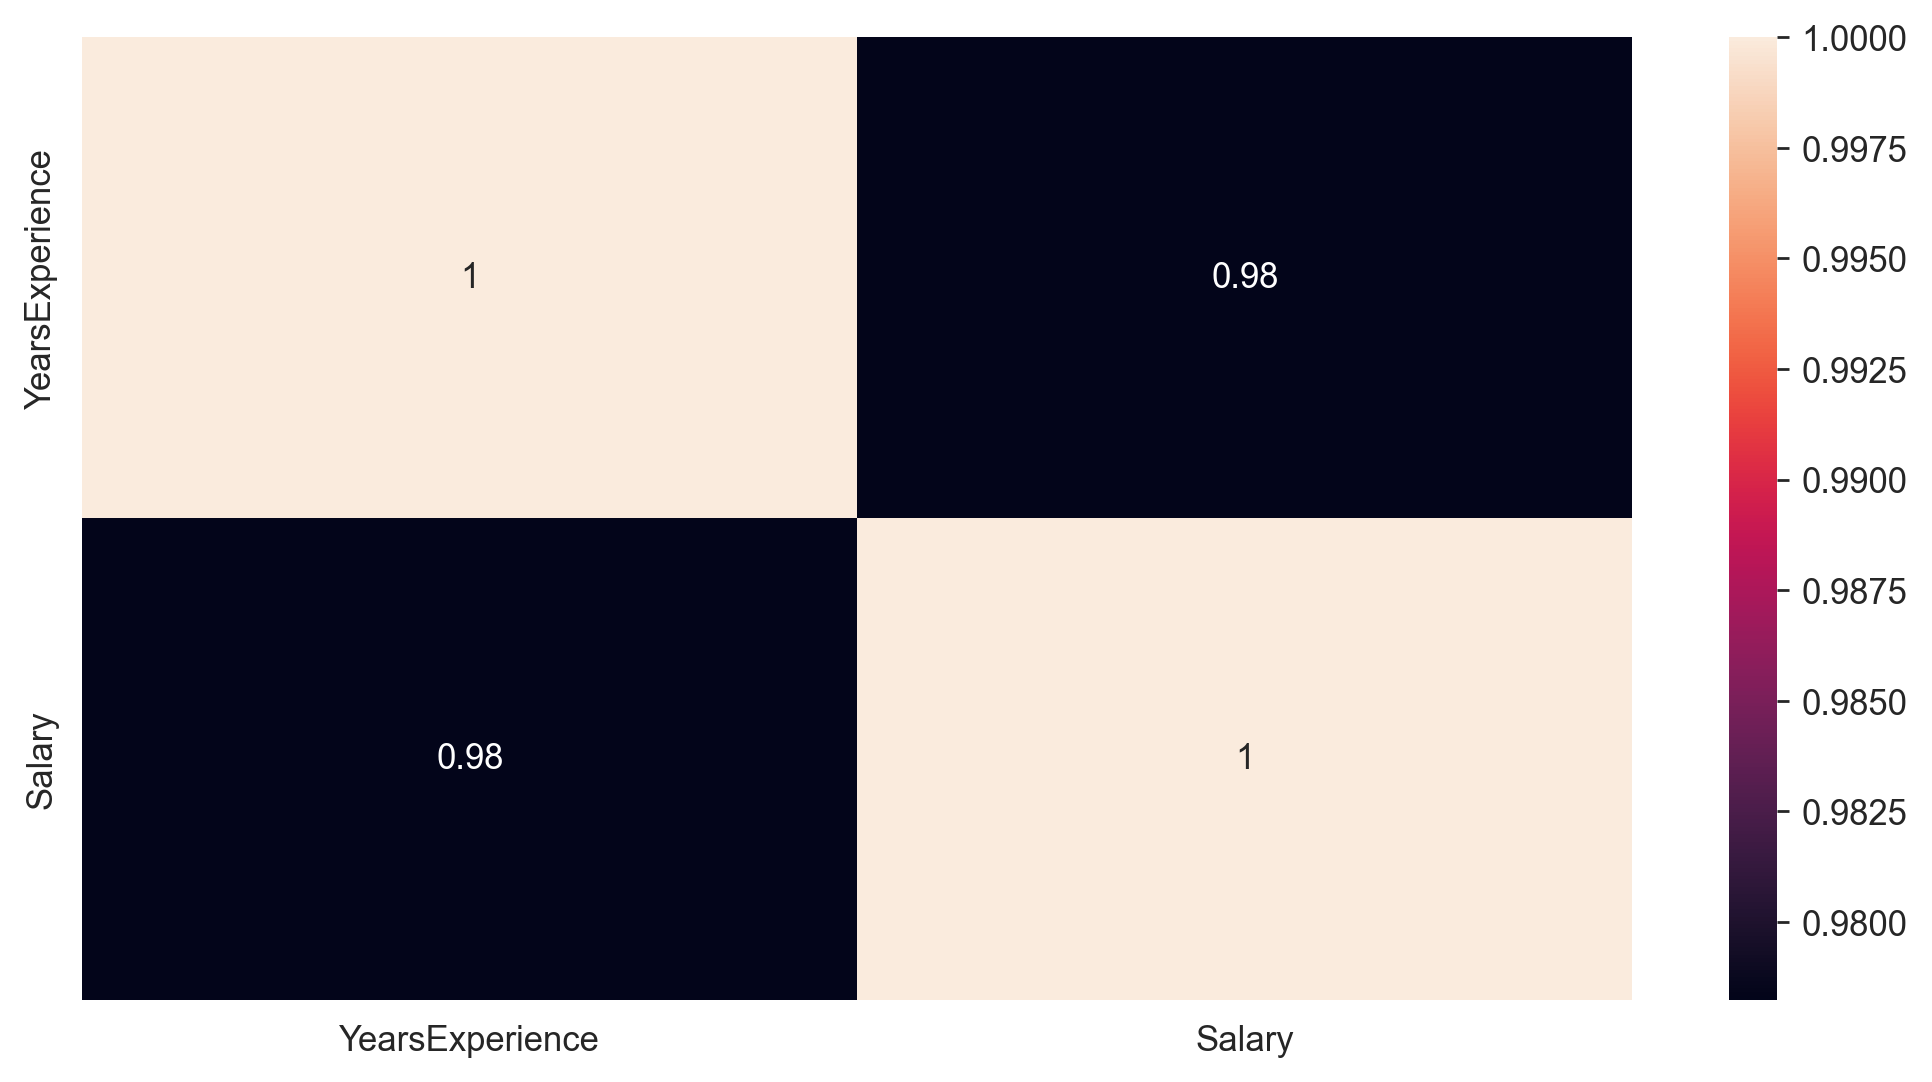

In [5]:
sns.heatmap(df.corr(),annot=True)

In [6]:
import statsmodels.formula.api as smf

In [7]:
model=smf.ols('Salary~YearsExperience',data=df).fit()

In [8]:
model.params

Intercept          24848.203967
YearsExperience     9449.962321
dtype: float64

In [9]:
model.rsquared

0.9569566641435086

In [10]:
#alpha=0.05 , e-11 means 11 zeros before the value the here reject null hypothesis
model.pvalues

Intercept          1.816526e-11
YearsExperience    1.143068e-20
dtype: float64

In [11]:
YearsExperience=11
y= 9449.962321*YearsExperience+24848.203967
y

128797.789498

In [12]:
newdf=pd.DataFrame({'YearsExperience':[11,1,2,13,14,15]})
newdf

,YearsExperience
0,11
1,1
2,2
3,13
4,14
5,15


In [13]:
model.predict(newdf)

0    128797.789503
1     34298.166288
2     43748.128609
3    147697.714145
4    157147.676467
5    166597.638788
dtype: float64

Text(0.5, 1.0, 'salary')

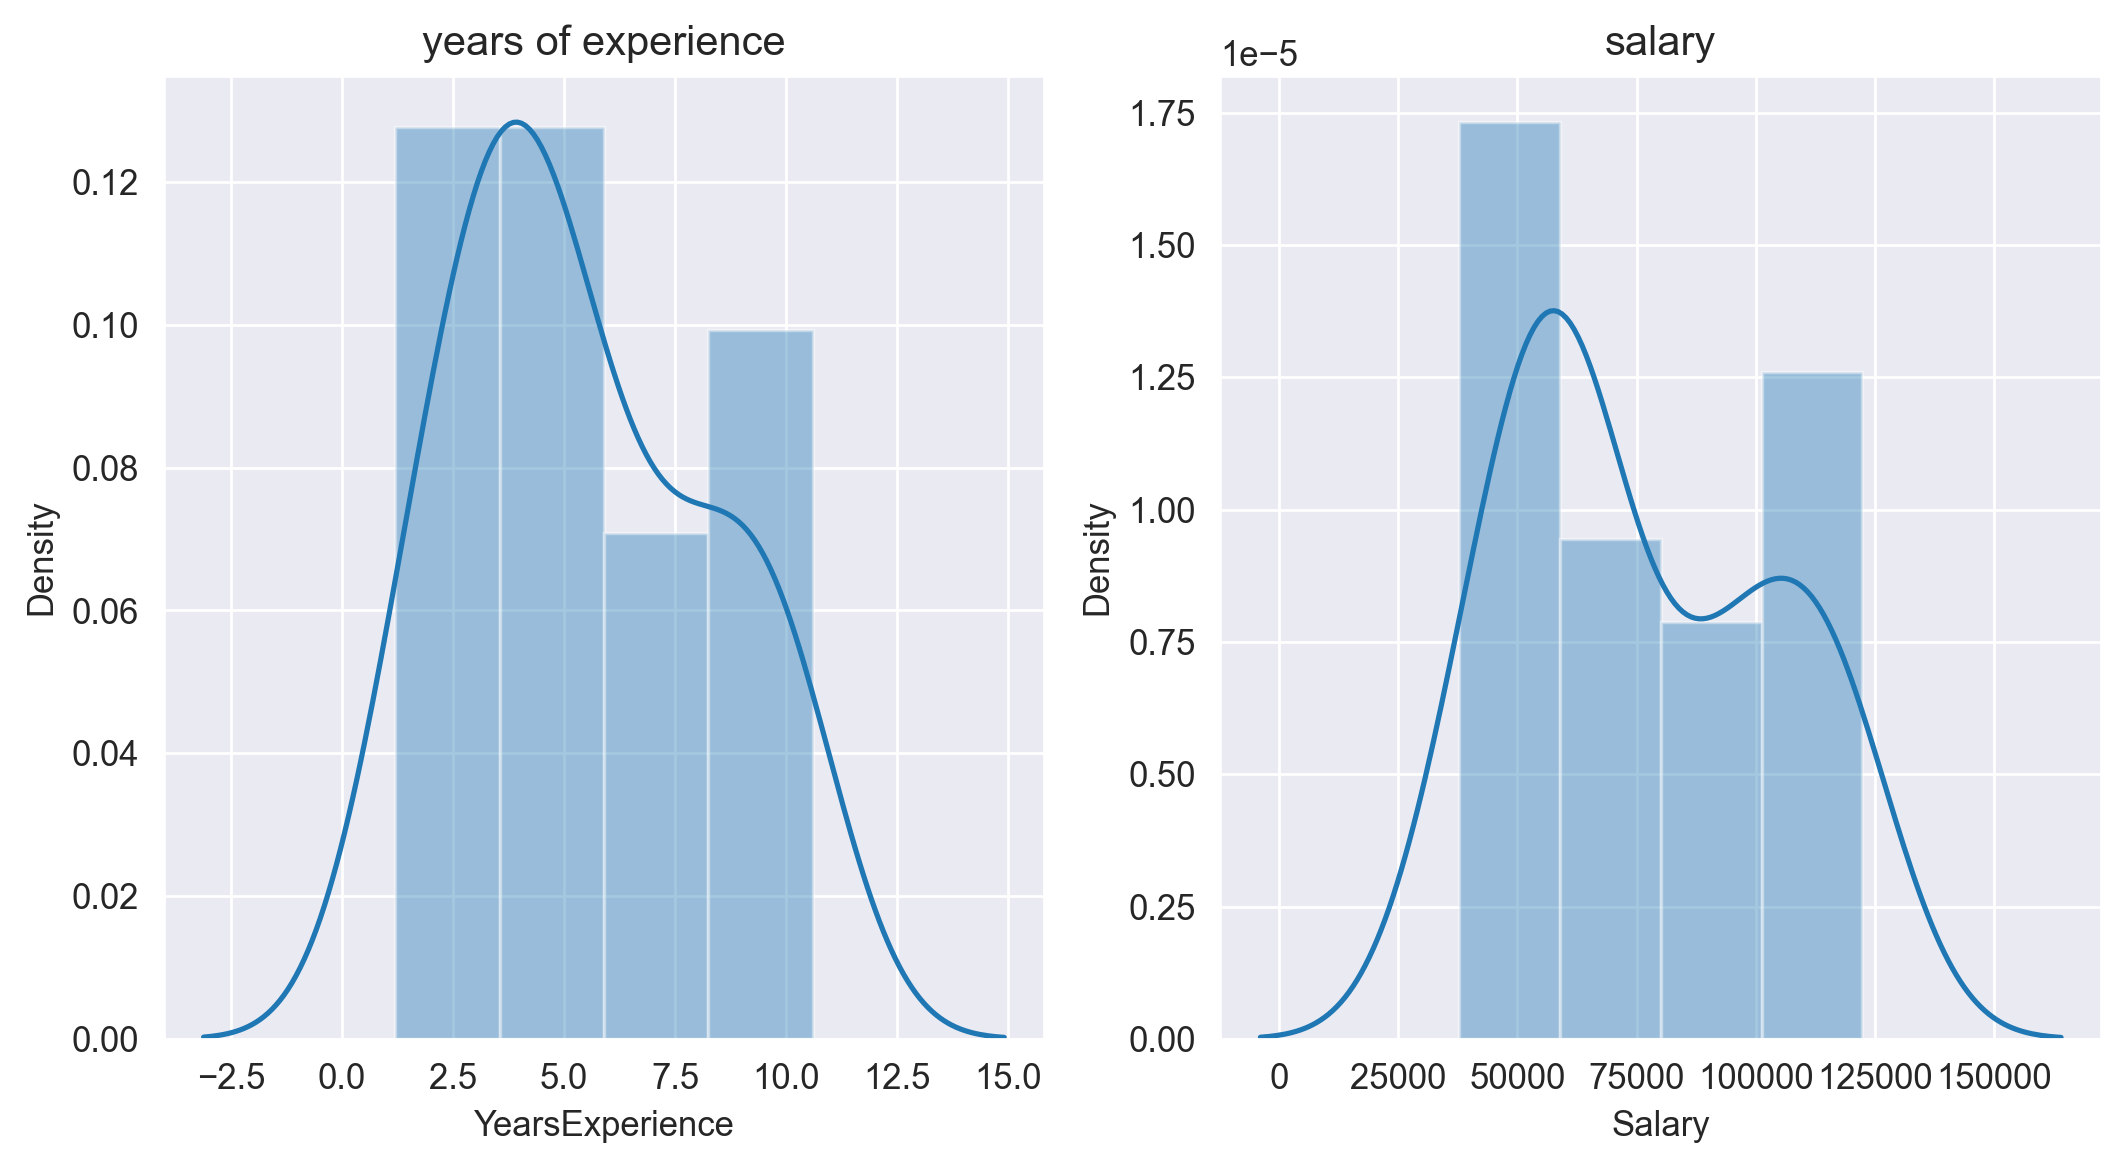

In [14]:
import warnings
warnings.filterwarnings('ignore')
plt.subplot(1,2,1)
sns.distplot(df['YearsExperience'])
plt.title('years of experience')

plt.subplot(1,2,2)
sns.distplot(df['Salary'])
plt.title('salary')



In [16]:
df['Salary'].skew()

0.35411967922959153

In [17]:
df['YearsExperience'].skew()

0.37956024064804234

In [18]:
df.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


In [19]:
df['log_ex'] = np.log(df['YearsExperience'])
df['log_salary'] = np.log(df['Salary'])
df.head()

,YearsExperience,Salary,log_ex,log_salary
0,1.2,39344.0,0.182322,10.580099
1,1.4,46206.0,0.336472,10.740865
2,1.6,37732.0,0.470004,10.538264
3,2.1,43526.0,0.741937,10.681114
4,2.3,39892.0,0.832909,10.593931


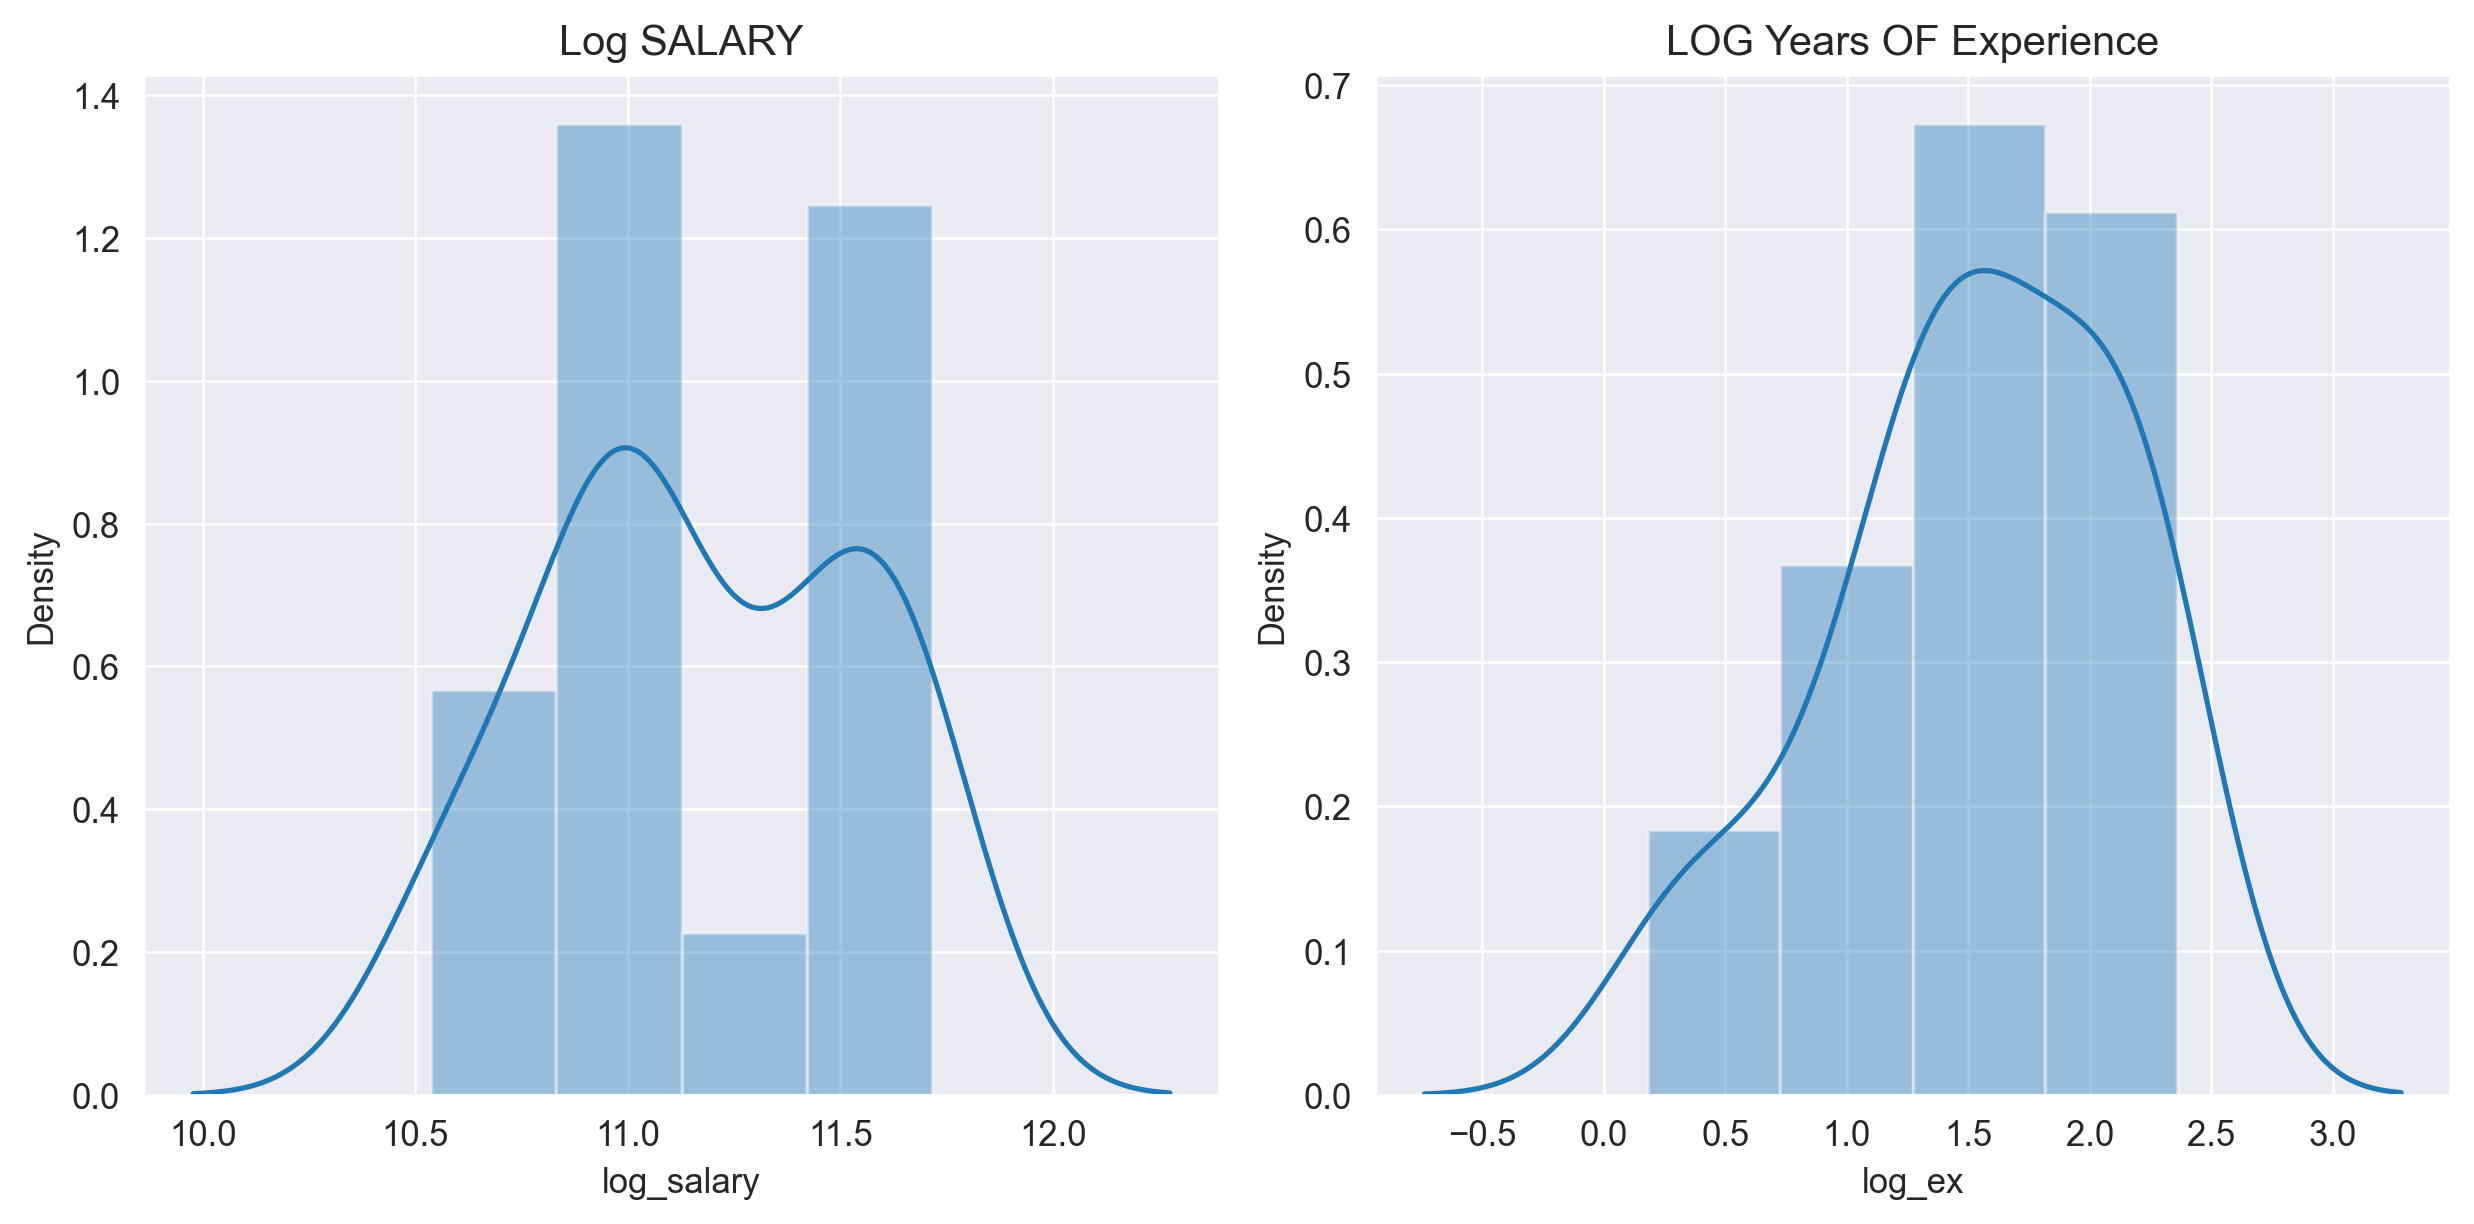

In [20]:
plt.subplot(1,2,1)
sns.distplot(df['log_salary'])
plt.title('Log SALARY')

plt.subplot(1,2,2)
sns.distplot(df['log_ex'])
plt.title('LOG Years OF Experience')

plt.tight_layout()

In [21]:
df['log_ex'].skew()

-0.5651393023600187

In [22]:
df['log_salary'].skew()

-0.044119130680495854